# Script to do plots for Part 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])
# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

# Plot power and thrust coefficients against TSR

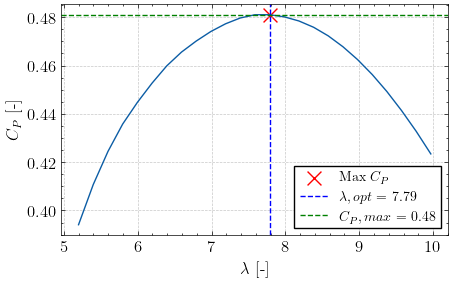

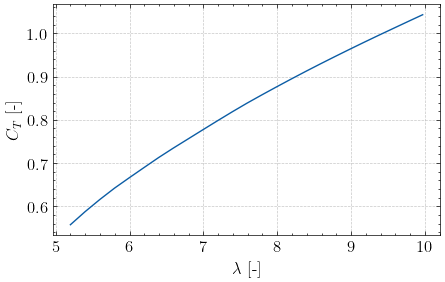

In [36]:
 #        V [m/s]  1           P [kW]  2           T [kN]  3           Cp [-]  4           Ct [-]  5     Pitch Q [Nm]  6     Flap M [kNm]  7     Edge M [kNm]  8      Pitch [deg]  9      Speed [rpm] 10        Tip x [m] 11        Tip y [m] 12        Tip z [m] 13   J_rot [kg*m^2] 14    J_DT [kg*m^2] 15      Tors. [rad] 28    Torque [kNm]  29
# Given rotor radius R (provide the value in meters)
R_BB_neo = 91.5  # [m]

# Load the data using np.loadtxt
# Adjust the delimiter and number of columns if needed
data = np.loadtxt('../my_design/res_hawc2s/BB_hawc2s_multitsr.pwr', skiprows=1)

# Extract relevant columns
wind_speed = data[:, 0]  # V [m/s]
rpm = data[:, 9]         # Speed [rpm]
Cp = data[:, 3]          # Cp [-]
Ct = data[:, 4]          # Ct [-]
pitch = data[:,8]        # pitch [deg]

# Calculate omega (rad/s) and TSR
omega = np.pi * rpm / 30
TSR = (omega * R_BB_neo) / wind_speed

# Find the max Cp and its corresponding TSR
max_cp_index = np.argmax(Cp)
max_cp = Cp[max_cp_index]
max_tsr = TSR[max_cp_index]



import matplotlib.pyplot as plt

# Plot Cp vs TSR
plt.figure(figsize=(5, 3))
plt.plot(TSR, Cp)

# Plot the max point with an 'x'
plt.scatter(max_tsr, max_cp, color='red', marker='x', s=100, label=r'Max $C_P$')

# Add vertical and horizontal dashed lines
plt.axvline(x=max_tsr, color='blue', linestyle='--', linewidth=1, label=fr'$\lambda,opt $ = {max_tsr:.2f}')
plt.axhline(y=max_cp, color='green', linestyle='--', linewidth=1, label=fr'$C_P,max$ = {max_cp:.2f}')


# Labels, legend, and grid
plt.xlabel(r'$\lambda$ [-]')
plt.ylabel(r'$C_P$ [-]')
plt.legend(loc='lower right', fontsize = 10)
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
# plt.savefig('plots/CP_TSR_BB_neo' + '.pdf', dpi=300, bbox_inches='tight')




# Plot Ct vs TSR
plt.figure(figsize=(5,3))
plt.plot(TSR, Ct)
plt.xlabel(r'$\lambda$ [-]')
plt.ylabel(r'$C_T$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('plots/Ct_TSR_BB_neo' + '.pdf', dpi=300, bbox_inches='tight')

# Rotor speed and pitch angle vs wind speed

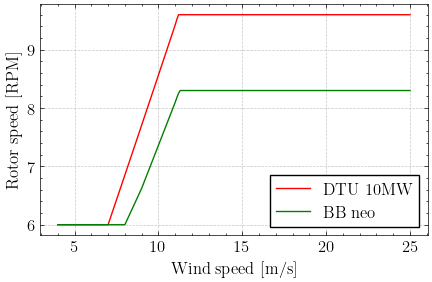

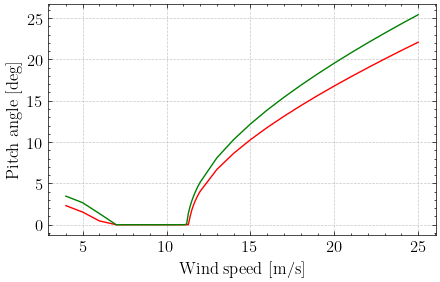

In [57]:
# Import the data from the appropriate file
data_BB_neo = np.loadtxt('../my_design/data/BB_compute_flex_opt.opt', skiprows=1)
data_dtu_10mw = np.loadtxt('../dtu_10mw/data/dtu_10mw_flex_minrotspd.opt', skiprows=1)

# Extract relevant columns for BB neo
wind_speed_BB_neo = data_BB_neo[:, 0]     # V [m/s]
pitch_BB_neo = data_BB_neo[:, 1]          # pitch [deg]
rot_speed_BB_neo = data_BB_neo[:, 2]      # rotor speed [rpm]
power_BB_neo = data_BB_neo[:, 3]          # aero power [kW]
thrust_BB_neo = data_BB_neo[:,4]          # thrust [kN]

# Extract relevant columns for DTU 10MW
R_dtu_10mw = 89.16                            # [m]
wind_speed_dtu_10mw = data_dtu_10mw[:, 0]     # V [m/s]
pitch_dtu_10mw = data_dtu_10mw[:, 1]          # pitch [deg]
rot_speed_dtu_10mw = data_dtu_10mw[:, 2]      # rotor speed [rpm]
power_dtu_10mw = data_dtu_10mw[:, 3]          # aero power [kW]
thrust_dtu_10mw = data_dtu_10mw[:,4]          # thrust [kN]

# Calculate the coefficients
rho = 1.225                                 # typical value for density [kg/m^3]

# BB neo
A_BB_neo = np.pi*R_BB_neo**2                              # rotor surface are
Cp_BB_neo = power_BB_neo*1000/(0.5*rho*wind_speed_BB_neo**3*A_BB_neo)    # Power coefficient [-]  
Ct_BB_neo = thrust_BB_neo*1000/(0.5*rho*wind_speed_BB_neo**2*A_BB_neo)   # Thrust coefficient [-]

# DTU 10MW
A_dtu_10mw = np.pi*R_dtu_10mw**2                              # rotor surface are
Cp_dtu_10mw = power_dtu_10mw*1000/(0.5*rho*wind_speed_dtu_10mw**3*A_dtu_10mw)    # Power coefficient [-]  
Ct_dtu_10mw = thrust_dtu_10mw*1000/(0.5*rho*wind_speed_dtu_10mw**2*A_dtu_10mw)   # Thrust coefficient [-]

# Plot RPM vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_dtu_10mw, rot_speed_dtu_10mw, color='red', label='DTU 10MW')
plt.plot(wind_speed_BB_neo, rot_speed_BB_neo, color='green', label='BB neo')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Rotor speed [RPM]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('plots/rpm_wsp_BBneo_dtu10mw' + '.pdf', dpi=300, bbox_inches='tight')

# Plot pitch vs wind speed
plt.figure(figsize=(5,3))
plt.plot(wind_speed_dtu_10mw, pitch_dtu_10mw, color='red', label='DTU 10MW')
plt.plot(wind_speed_BB_neo, pitch_BB_neo, color='green', label='BB neo')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Pitch angle [deg]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('plots/pitch_wsp_BBneo_dtu10mw' + '.pdf', dpi=300, bbox_inches='tight')

# Aero power and Cp

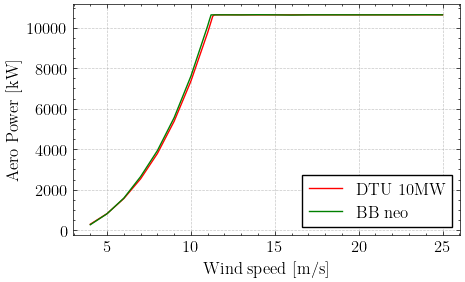

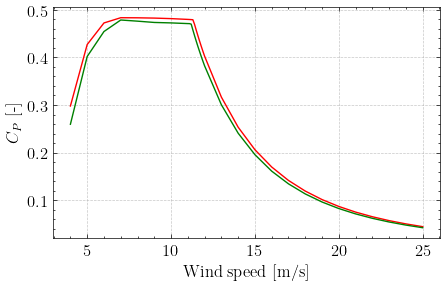

In [58]:
# Plot Aero power vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_dtu_10mw, power_dtu_10mw, color='red', label='DTU 10MW')
plt.plot(wind_speed_BB_neo, power_BB_neo, color='green', label='BB neo')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Aero Power [kW]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
# plt.savefig('plots/power_wsp_BBneo_dtu10mw' + '.pdf', dpi=300, bbox_inches='tight')

# Plot CP vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_dtu_10mw, Cp_dtu_10mw, color='red', label='DTU 10MW')
plt.plot(wind_speed_BB_neo, Cp_BB_neo, color='green', label='BB neo')
plt.xlabel('Wind speed [m/s]')
plt.ylabel(r'$C_P$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('plots/Cp_wsp_BBneo_dtu10mw' + '.pdf', dpi=300, bbox_inches='tight')

# Aero thrust and Ct

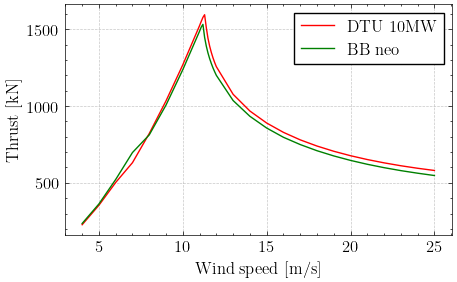

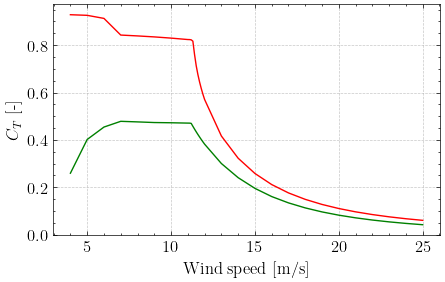

In [59]:
# Plot thrust vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_dtu_10mw, thrust_dtu_10mw, color='red', label='DTU 10MW')
plt.plot(wind_speed_BB_neo, thrust_BB_neo, color='green', label='BB neo')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Thrust [kN]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
# plt.savefig('plots/thrust_wsp_BBneo_dtu10mw' + '.pdf', dpi=300, bbox_inches='tight')

# Plot Ct vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_dtu_10mw, Ct_dtu_10mw, color='red', label='DTU 10MW')
plt.plot(wind_speed_BB_neo, Cp_BB_neo, color='green', label='BB neo')
plt.xlabel('Wind speed [m/s]')
plt.ylabel(r'$C_T$ [-]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('plots/CT_wsp_BBneo_dtu10mw' + '.pdf', dpi=300, bbox_inches='tight')

# Torque : PWR file looks bad

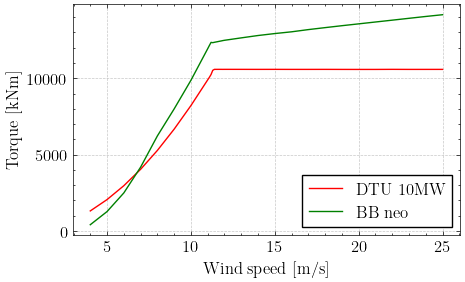

In [56]:
# Import the data from the appropriate file
data_BB_neo_pwr = np.loadtxt('../my_design/res_hawc2s/BB_hawc2s_1wsp_flex.pwr', skiprows=1)
data_dtu_10mw_pwr = np.loadtxt('../dtu_10mw/res_hawc2s/dtu_10mw_compute_flex_opt.pwr', skiprows=1)


# Extract relevant columns for BB neo
wind_speed_BB_neo_pwr = data_BB_neo_pwr[:, 0]     # V [m/s]
torque_BB_neo_pwr = data_BB_neo_pwr[:, 16]     # Q [kNm]

# Extract relevant columns for DTU 10MW
wind_speed_dtu_10mw_pwr = data_dtu_10mw_pwr[:, 0]     # V [m/s]
torque_dtu_10mw_pwr = data_dtu_10mw_pwr[:, 16]     # Q [kNm]


# Plot RPM vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(wind_speed_dtu_10mw_pwr, torque_dtu_10mw_pwr, color='red', label='DTU 10MW')
plt.plot(wind_speed_BB_neo, torque_BB_neo_pwr, color='green', label='BB neo')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Torque [kNm]')
plt.legend()
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
# plt.savefig('Part_3_Plots/RPM_V_inf_BB' + '.pdf', dpi=300, bbox_inches='tight')